#Erwan LeCun
#Homework 7: Time Series

In [1]:
import numpy as np
import pylab as pl
import scipy
import pandas as pd
import operator
pl.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Task 1

In [2]:
# read data
mta = np.load('MTA_Fare.npy').astype(float)

In [3]:
# replace -1 with NaN values
mta[mta == -1] = np.nan

In [4]:
# sum by rides
rides_sum = np.nansum(mta, axis = 1)
df = pd.DataFrame(rides_sum)
df = df.transpose()

In [5]:
# associate each sum with corresponding date
dateRange = pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/07/2014'), freq = 'W')
df.index = pd.Index(dateRange)

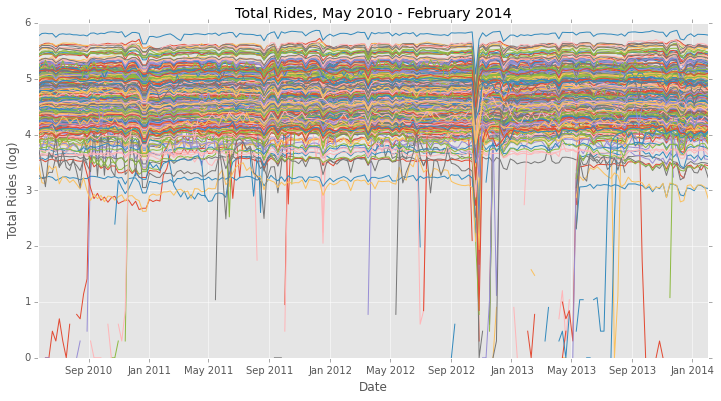

In [6]:
# plot
pl.figure(figsize=(12, 6))
pl.plot(df.index, np.log10(df))
pl.xlabel('Date')
pl.ylabel('Total Rides (log)')
pl.title('Total Rides, May 2010 - February 2014')

### There appears to be a very big drop around October/December of 2012.
### I would guess that this is due to Hurricane Sandy.

# Task 2

In [7]:
ridetypes = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [8]:
# sum by ride type
station_sum = np.nansum(mta, axis = 0)
df_2 = pd.DataFrame(station_sum)
df_2 = df_2.transpose()

In [9]:
# associate each sum with corresponding date
df_2.index = pd.Index(dateRange)

In [10]:
# rename columns by ride type
df_2.rename(columns = lambda k: ridetypes[k], inplace = True)

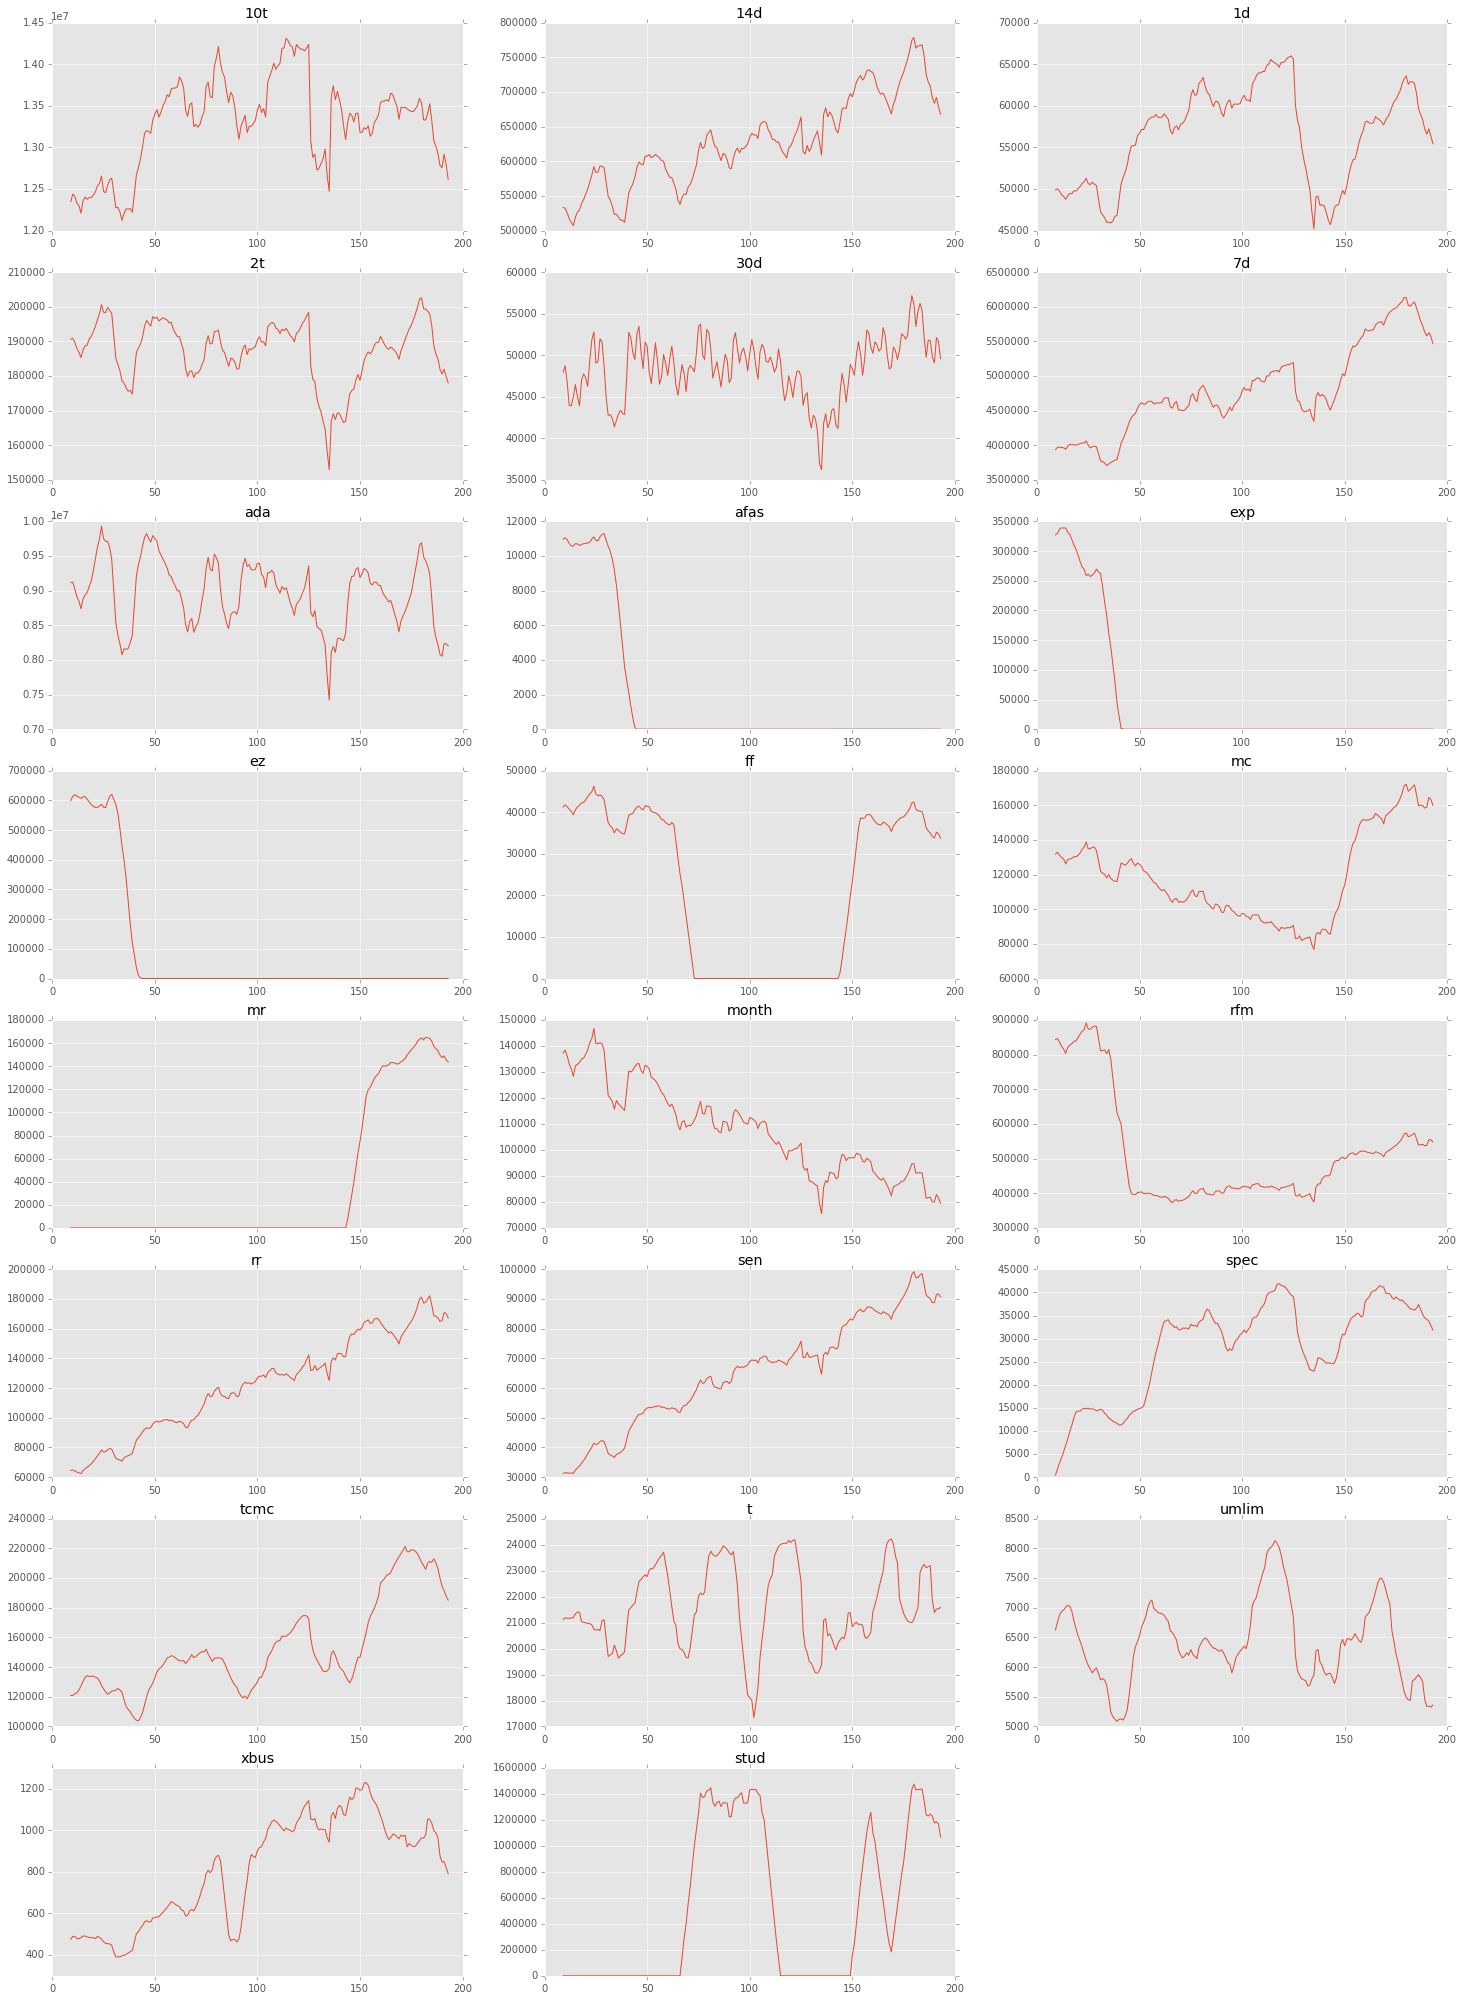

In [11]:
# plot
fig = pl.figure(figsize=(25,35))
for i in range(0, 23):
    ax = fig.add_subplot(8, 3, i+1)
    ax.plot(pd.rolling_mean(df_2[ridetypes[i]], 10))
    ax.set_title(ridetypes[i])

### Increasing: 14d, 7d, ff, sen
### Decreasing: month

In [12]:
# print ratios for first 10 and last 10 weeks
for i in df_2.columns:
    ratio = df_2[i].head(10).mean() / df_2[i].tail(10).mean()
    print ('Flux Ratio for ' + str(i) + ': ' + str(ratio))

Flux Ratio for 10t: 0.978667087302
Flux Ratio for 14d: 0.79868054602
Flux Ratio for 1d: 0.899810476622
Flux Ratio for 2t: 1.07088927164
Flux Ratio for 30d: 0.967317176485
Flux Ratio for 7d: 0.719555117345
Flux Ratio for ada: 1.11130702032
Flux Ratio for afas: 4774.47826087
Flux Ratio for exp: 93571.3428571
Flux Ratio for ez: 665798.555556
Flux Ratio for ff: 1.22129628533
Flux Ratio for mc: 0.824035088267
Flux Ratio for mr: 4.03470963308e-05
Flux Ratio for month: 1.72794422105
Flux Ratio for rfm: 1.53938888675
Flux Ratio for rr: 0.385659649203
Flux Ratio for sen: 0.343713862169
Flux Ratio for spec: 0.0142485908332
Flux Ratio for tcmc: 0.652626042706
Flux Ratio for t: 0.978867204328
Flux Ratio for umlim: 1.23599634403
Flux Ratio for xbus: 0.601566447701
Flux Ratio for stud: 0.0


# Task 3

In [13]:
# sum by rides
rides_sum = np.nansum(mta, axis = 1)
df = pd.DataFrame(rides_sum)

# perform fourier transform
fourier = np.abs(np.fft.rfft(df))
print(fourier.shape)

(600, 98)


/Users/erwan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


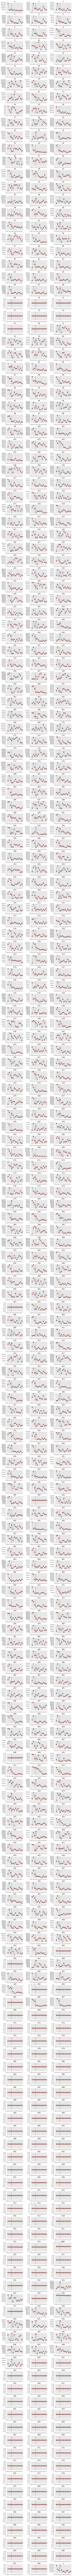

In [14]:
periods = {}

# loop through to plot and check for periodicity

fig = plt.figure(figsize=(10,400))

for i in range(600):
    ax = fig.add_subplot(200,3,i)
    f = np.abs(np.fft.rfft(df.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), 'o', ms = 8)
    ax.set_title("%i" % (i-1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), '-')
    ax.set_xlim(0, 1.0/15)
    plt.axvline(1.0/52, color='g')
    pl.subplots_adjust(wspace = 0.5, hspace = 0.5)
    periods[i] = np.abs(np.fft.rfft(rides_sum[i])[4])

In [15]:
sorted_periods = sorted(periods.items(), key=operator.itemgetter(1))

print("Stations that show prominent annual periodicity:")

print(sorted_periods[596:600])

Stations that show prominent annual periodicity:
[(327, 2402218.5809588572), (150, 2931895.8769513383), (194, 2950388.929214194), (0, 2980160.6355953491)]
